## Data Cleaning

In [35]:

import pandas as pd


file_path = 'HealthData.csv'
health_data = pd.read_csv(file_path)


print("Missing values per column:")
print(health_data.isnull().sum())


health_data_cleaned = health_data.dropna()


print("\nCleaned Dataset:")
print(health_data_cleaned.head())


Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Cleaned Dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    1  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


## Exploratory Data Analysis (EDA)

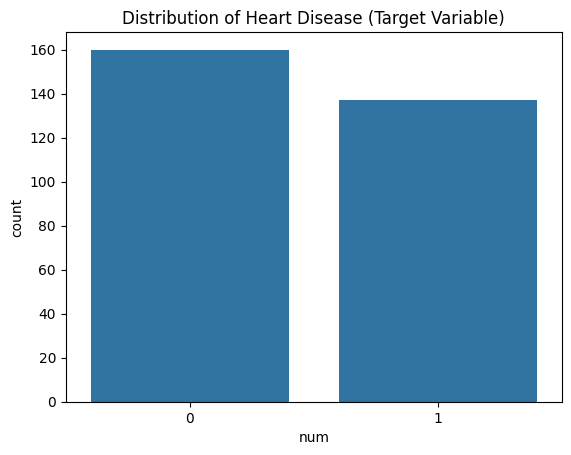

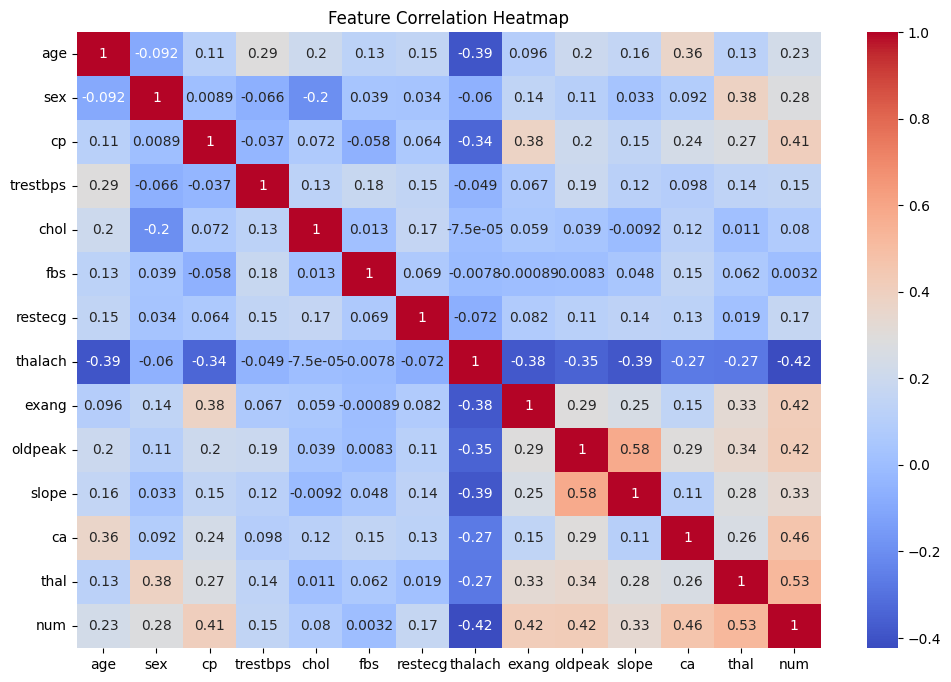

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

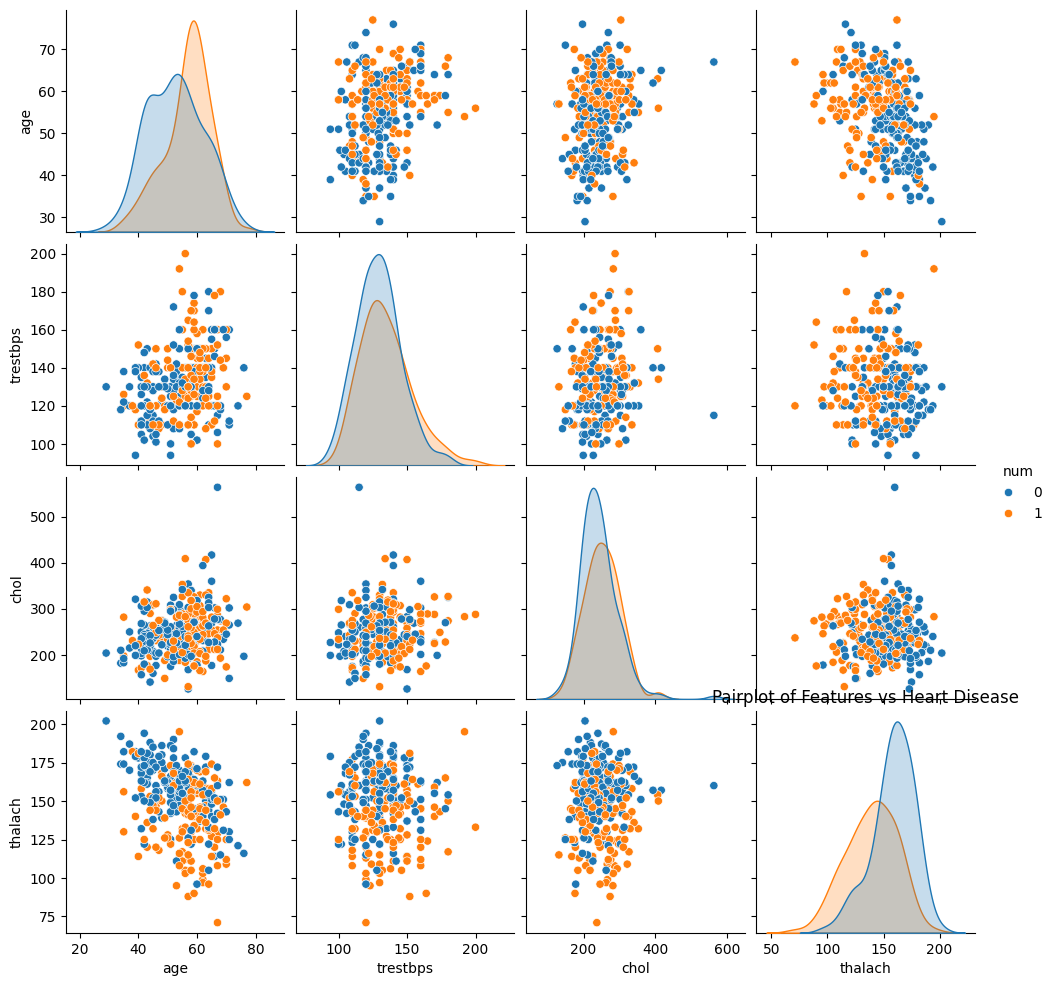

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(x='num', data=health_data_cleaned)
plt.title('Distribution of Heart Disease (Target Variable)')
plt.show()


plt.figure(figsize=(12, 8))
sns.heatmap(health_data_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


sns.pairplot(health_data_cleaned, vars=['age', 'trestbps', 'chol', 'thalach'], hue='num')
plt.title('Pairplot of Features vs Heart Disease')
plt.show()


## Data Preprocessing

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


label_encoder = LabelEncoder()


for col in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']:
    health_data_cleaned[col] = label_encoder.fit_transform(health_data_cleaned[col])


X = health_data_cleaned.drop(columns=['num'])
y = health_data_cleaned['num']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


print(f"Training Set Shape: {X_train.shape}")
print(f"Testing Set Shape: {X_test.shape}")


Training Set Shape: (237, 13)
Testing Set Shape: (60, 13)


<ipython-input-37-0956ab44a7d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_data_cleaned[col] = label_encoder.fit_transform(health_data_cleaned[col])
<ipython-input-37-0956ab44a7d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_data_cleaned[col] = label_encoder.fit_transform(health_data_cleaned[col])
<ipython-input-37-0956ab44a7d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

## Logistic Regression

Logistic Regression Accuracy: 0.8833333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



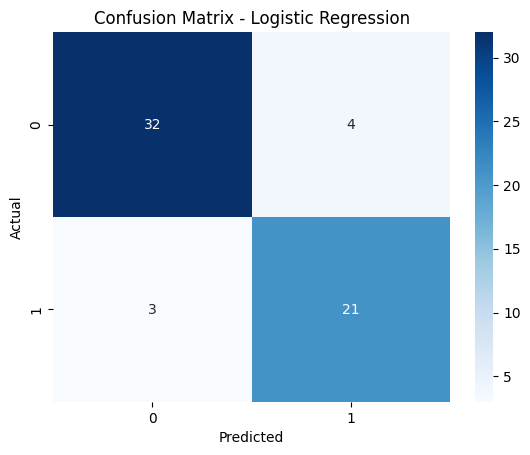

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)


y_pred_log_reg = log_reg.predict(X_test_scaled)


print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))


conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Scaling

In [39]:

continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


scaler = StandardScaler()
X_train_scaled_continuous = scaler.fit_transform(X_train[continuous_features])

X_train_scaled = pd.concat([pd.DataFrame(X_train_scaled_continuous, columns=continuous_features),
                            X_train[categorical_features].reset_index(drop=True)], axis=1)


## Naive Bayes

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Naive Bayes Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.97      0.78        36
           1       0.83      0.21      0.33        24

    accuracy                           0.67        60
   macro avg       0.74      0.59      0.56        60
weighted avg       0.72      0.67      0.60        60



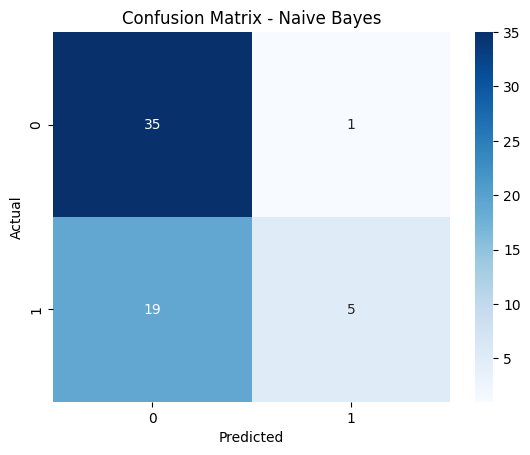

In [40]:
from sklearn.naive_bayes import GaussianNB


naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, y_train)


y_pred_naive_bayes = naive_bayes.predict(X_test_scaled)


print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_naive_bayes))
print("Classification Report:")
print(classification_report(y_test, y_pred_naive_bayes))


conf_matrix = confusion_matrix(y_test, y_pred_naive_bayes)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Decision Tree

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Decision Tree Accuracy: 0.6
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.78      0.70        36
           1       0.50      0.33      0.40        24

    accuracy                           0.60        60
   macro avg       0.57      0.56      0.55        60
weighted avg       0.58      0.60      0.58        60



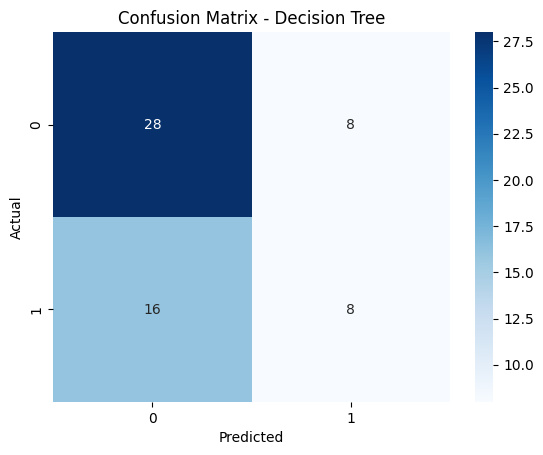

In [41]:
from sklearn.tree import DecisionTreeClassifier


decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)


y_pred_decision_tree = decision_tree.predict(X_test_scaled)


print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_decision_tree))
print("Classification Report:")
print(classification_report(y_test, y_pred_decision_tree))


conf_matrix = confusion_matrix(y_test, y_pred_decision_tree)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Support Vector Classifier (SVC)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


SVC Accuracy: 0.65
Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        36
           1       1.00      0.12      0.22        24

    accuracy                           0.65        60
   macro avg       0.82      0.56      0.50        60
weighted avg       0.78      0.65      0.55        60



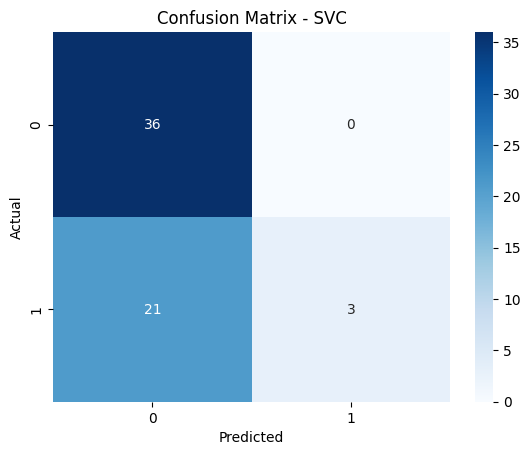

In [42]:
from sklearn.svm import SVC


svc = SVC(random_state=42)
svc.fit(X_train_scaled, y_train)


y_pred_svc = svc.predict(X_test_scaled)


print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))


conf_matrix = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - SVC")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Model Comparison

In [43]:

model_performance = {
    'Logistic Regression': accuracy_score(y_test, y_pred_log_reg),
    'Naive Bayes': accuracy_score(y_test, y_pred_naive_bayes),
    'Decision Tree': accuracy_score(y_test, y_pred_decision_tree),
    'SVC': accuracy_score(y_test, y_pred_svc)
}


print("\nModel Comparison:")
for model, accuracy in model_performance.items():
    print(f"{model}: {accuracy * 100:.2f}%")



Model Comparison:
Logistic Regression: 88.33%
Naive Bayes: 66.67%
Decision Tree: 60.00%
SVC: 65.00%


## User Input

In [44]:
import ipywidgets as widgets
from IPython.display import display


age = widgets.IntText(value=45, description='Age:')
sex = widgets.IntSlider(value=1, min=0, max=1, description='Sex (0=F, 1=M):')
cp = widgets.IntSlider(value=2, min=0, max=3, description='Chest Pain:')
trestbps = widgets.IntText(value=130, description='Resting BP:')
chol = widgets.IntText(value=250, description='Cholesterol:')
fbs = widgets.IntSlider(value=0, min=0, max=1, description='Fasting BS:')
restecg = widgets.IntSlider(value=1, min=0, max=2, description='Rest ECG:')
thalach = widgets.IntText(value=150, description='Max HR:')
exang = widgets.IntSlider(value=0, min=0, max=1, description='Ex. Angina:')
oldpeak = widgets.FloatText(value=1.5, description='Oldpeak:')
slope = widgets.IntSlider(value=1, min=0, max=2, description='Slope:')
ca = widgets.IntSlider(value=0, min=0, max=3, description='CA:')
thal = widgets.IntSlider(value=2, min=0, max=2, description='Thal:')


display(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal)


IntText(value=45, description='Age:')

IntSlider(value=1, description='Sex (0=F, 1=M):', max=1)

IntSlider(value=2, description='Chest Pain:', max=3)

IntText(value=130, description='Resting BP:')

IntText(value=250, description='Cholesterol:')

IntSlider(value=0, description='Fasting BS:', max=1)

IntSlider(value=1, description='Rest ECG:', max=2)

IntText(value=150, description='Max HR:')

IntSlider(value=0, description='Ex. Angina:', max=1)

FloatText(value=1.5, description='Oldpeak:')

IntSlider(value=1, description='Slope:', max=2)

IntSlider(value=0, description='CA:', max=3)

IntSlider(value=2, description='Thal:', max=2)

In [45]:
import pandas as pd


def get_user_input():
    user_data = {
        'age': age.value,
        'sex': sex.value,
        'cp': cp.value,
        'trestbps': trestbps.value,
        'chol': chol.value,
        'fbs': fbs.value,
        'restecg': restecg.value,
        'thalach': thalach.value,
        'exang': exang.value,
        'oldpeak': oldpeak.value,
        'slope': slope.value,
        'ca': ca.value,
        'thal': thal.value
    }
    return user_data


import pandas as pd


def preprocess_input(user_data, scaler):

    user_input_df = pd.DataFrame([user_data])


    continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


    user_input_df[continuous_features] = scaler.transform(user_input_df[continuous_features])


    return user_input_df[categorical_features + continuous_features]

In [46]:

user_data = get_user_input()


user_input_df = preprocess_input(user_data, scaler)


prediction = make_prediction(log_reg, user_input_df)


if prediction[0] == 1:
    print("Prediction: The patient is likely to have heart disease.")
else:
    print("Prediction: The patient is unlikely to have heart disease.")


Prediction: The patient is likely to have heart disease.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
